# Tutorial on Making Synthetic Data

This notebook will show some examples of how to generate data with the tools that we've made. Our aim is to be able to test the capabilities of ESA in specific scenarios, and we can only do that if we can control the data we start with.

### An overview of how the data generation system works:
- You can specify how many tastes, neurons, and trials per taste per neuron to generate.
- Only neuron recordings will be generated. Each trial will be a spike train of 500 milliseconds. The idea here is we want to look at five lick intervals, and the lick cycle is already normalized into 100 ms long intervals. Because all lick 'recordings' are the same, they will not be generated.
- Firing rates are user-specified. Each taste has a corresponding rate, denoted $\alpha R$. 
    - $\alpha R$ is defined as the average number of fires in each lick interval. It does not have to be an integer.
    - To achieve a granular level of rate change, we ask you to pass in a base rate $R$ and then pass in as many $\alpha$ values as there are tastes to generate. Each $\alpha$ will be multiplied by the base rate $R$.
    - In the case where $\alpha R$ is not an integer, we try to evenly distribute the fires as well as possible. We allocate the spikes among trials first, then among the lick intervals within each trial.
- The refractory period is observed; that is, neural fires cannot occur in consecutive milliseconds.
- The $\alpha R$ value must be greater than 0.2: We need to guarantee that each spike train generated will have at least one spike.
- Phases are user-specified. The phase is denoted P, and it represents where the spikes are likely to occur within a lick cycle. 
    - We have established ten phase templates, corresponding to phase codes 0-9 (these templates are expressed as probability density functions; the plots of these density functions can be found in this folder). 
    - P can be passed into the data generation function in four ways.
        - Pass in nothing: by default, the spikes will follow phase template 1 (uniform distribution).
        - Pass in one phase code: all lick intervals of all tastes have the same phase template. Passing in a 1 is equivalent to the default case.
        - Pass in a list with one phase code for each taste: all lick intervals have the same phase template within each taste.
        - Pass in a 2-D array of phase codes: the array needs to be of shape [nTastes x nLickIntervals]. Here, the phase template of each lick interval within each taste is specified.

In [1]:
import numpy as np
import pandas as pd
from synthetic_data_generator import *
from data_frame_tools import *
import matplotlib.pyplot as plt

## First Dataset

To start, let's keep it simple and generate two tastes for one neuron. Let's generate 20 trials for each taste. In the first dataset, we will assume no phase difference and change only the rate.

In [2]:
nTastes = 2
nNeurons = 1
nTrials = 20
base_rate = 3
alphas = [1, 1.2] # These coefficients corresponds to a firing rate of 3 for Taste '0', and 3.6 for Taste '1'.
data1 = make_synthetic_data(nTastes=nTastes, nNeurons=nNeurons, nTrials=nTrials, 
                            rate=base_rate, alpha=alphas)
data1

,Recording Type,Taste,Neuron,Trial,0,1,2,3,4,5,...,490,491,492,493,494,495,496,497,498,499
0,Neuron,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Neuron,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Neuron,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Neuron,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Neuron,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,Neuron,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Neuron,0,0,6,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Neuron,0,0,7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Neuron,0,0,8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Neuron,0,0,9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Here is the resulting dataset. Each spike train is indexed by recording type (for generated data, it will always be a neural signal), Taste ID, Neuron ID, and Trial ID. Following these identifiers, activity for 500 time points is given.

Let's look at one of the spike trains.

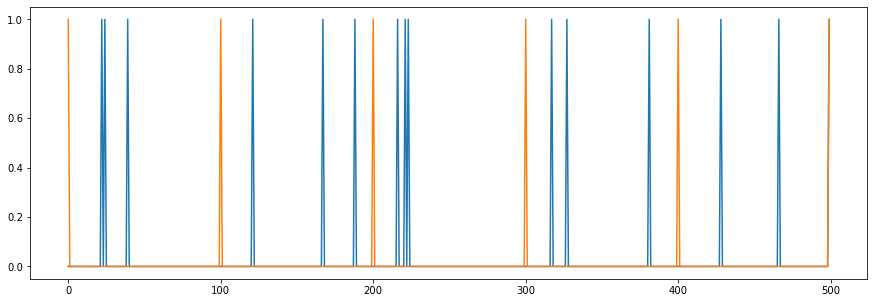

In [3]:
st1 = get_spike_train(dataFrame=data1, taste=0, neuron=0, trial=10)
lick_plot = np.zeros(shape=(500))
lick_plot[[0, 100, 200, 300, 400, 499]] = 1

figure = plt.figure(figsize=(15,5))
plt.plot(st1)
plt.plot(lick_plot)

There are exactly three spikes per lick interval, which is a result of the $\alpha R$ for this taste: exactly equal to 3. If we look any spike train from the other taste, we will see a total of 18 spikes over the 5 lick intervals (because $\alpha \times R \times nLick Ints = 1.2 \times 3 \times 5 = 18$). Every interval will get at least 3 spikes, and 3 lick intervals will be randomly chosen to recieve an extra spike.

## Second Dataset - constant rate, change phase per taste

//////Cam - I can't really think of a nicer way to word this. give me a while to think on it unless you have any ideas!

In this dataset, we have chosen to change the phase only per each taste, which means each lick interval of one taste will have the same phase code. Here, we've chosen to assign each taste a distinct portion of the lick interval to fire in - taste zero will fire in the first fifth of the interval, taste one will fire in the second fifth, etc.

In [4]:
nTastes = 5
nNeurons = 1
nTrials = 20
base_rate = 3
data2_phase_codes = [5, 6, 7, 8, 9]
alphas2 = [1, 1, 1, 1, 1] #this means the firing rate does not change for each taste - modify phase only in this dataset.

In [5]:
data2 = make_synthetic_data(nTastes=nTastes, nNeurons=nNeurons, nTrials=nTrials, 
                            rate=base_rate, alpha=alphas2, phase=data2_phase_codes)

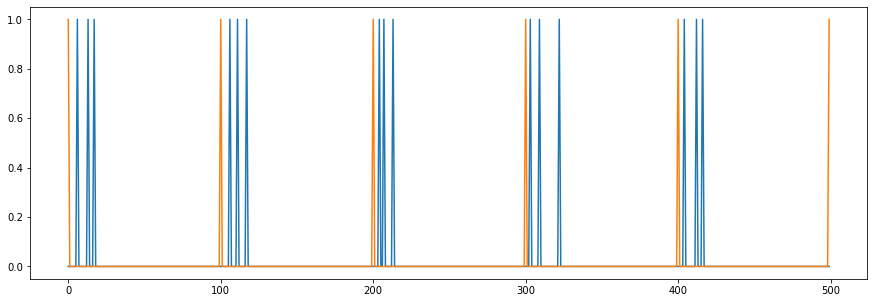

In [6]:
st3 = get_spike_train(data2, 0, 0, 15)

figure = plt.figure(figsize=(15,5))
plt.plot(st3)
lick_plot = np.zeros(shape=(500))
lick_plot[[0, 100, 200, 300, 400, 499]] = 1
plt.plot(lick_plot)

Here, you can see that this spike train (from dataset 2, taste 0, neuron 0, trial 15) has phase code 5, as expected. 

## Third Dataset - constant rate, change phase per LI

Now let's try specifying a unique phase template for each lick interval within each taste.

In [7]:
data3_phase_codes = np.zeros(shape=(5,5))
data3_phase_codes[0,:] = [1, 3, 2, 4, 0] # For taste '0' 
data3_phase_codes[1,:] = [1, 5, 7, 8, 0] # For taste '1'
data3_phase_codes[2,:] = [3, 4, 2, 0, 1]
data3_phase_codes[3,:] = [6, 9, 6, 0, 1]
data3_phase_codes[4,:] = [8, 8, 8, 8, 8]########I think i want to change this one -- at some lvl want to test all zeros and 3 vs all zeros and 5 (or something like that yk)

We've carefully created this pattern of phase codes to ensure we have a good variety of phase interactions - for example, taste 0 and taste 1 have generous overlap for several of their lick intervals, as do tastes 2 and 3, which makes for an interesting test of our ESA method. For now, we'll continue to keep our rate constant and not change the alpha values while looking at phase only.

In [8]:
alphas3 = [1, 1, 1, 1, 1]
nTastes = 5
nNeurons = 1
nTrials = 20
base_rate = 3
data3 = make_synthetic_data(nTastes=nTastes, nNeurons=nNeurons, nTrials=nTrials, 
                            rate=base_rate, alpha=alphas3, phase=data3_phase_codes)

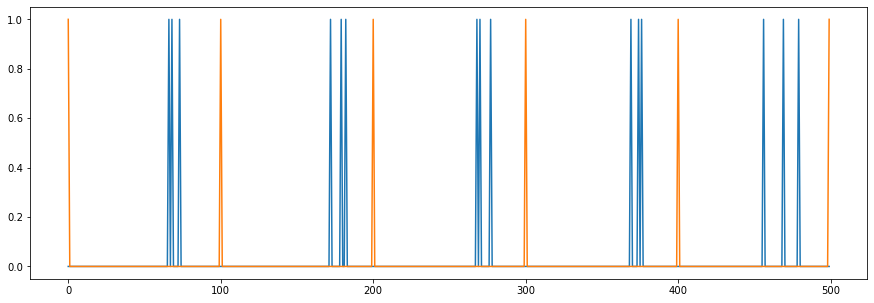

In [9]:
st3 = get_spike_train(data3, 4, 0, 5)

figure = plt.figure(figsize=(15,5))
plt.plot(st3)
lick_plot = np.zeros(shape=(500))
lick_plot[[0, 100, 200, 300, 400, 499]] = 1
plt.plot(lick_plot)

## Fourth dataset -combining rate and phase changes

Here, we generate data with a higher base rate of spiking while allowing the rate to change at the same time as we manipulate the phase codes for each lick interval in each taste. 

In [10]:
data4_phase_codes = np.zeros(shape=(5,5))
data4_phase_codes[0,:] = [0, 3, 2, 0, 0] # For taste '0' 
data4_phase_codes[1,:] = [0, 5, 7, 0, 0] # For taste '1'
data4_phase_codes[2,:] = [3, 0, 0, 0, 0]
data4_phase_codes[3,:] = [6, 0, 0, 0, 0]
data4_phase_codes[4,:] = [8, 8, 8, 8, 8]

In [25]:
alphas4 = [1, 1.25, 1.5, 1.2, 1.05]
nTastes = 5
nNeurons = 1
nTrials = 20
base_rate = 8
data4 = make_synthetic_data(nTastes=nTastes, nNeurons=nNeurons, nTrials=nTrials, 
                            rate=base_rate, alpha=alphas3, phase=data3_phase_codes)

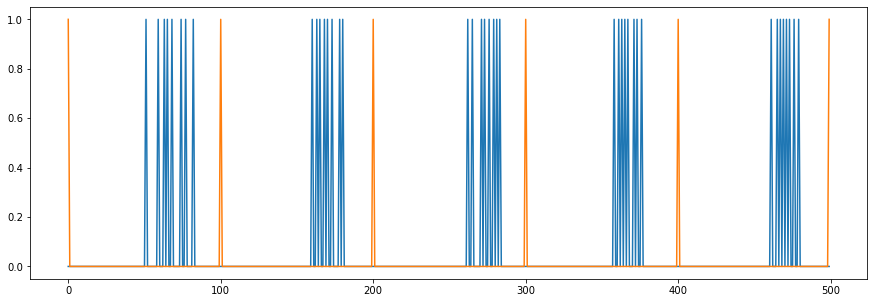

In [26]:
st4 = get_spike_train(data4, 4, 0, 10)
#taste 4, neuron 0, trial 10
figure = plt.figure(figsize=(15,5))
plt.plot(st4)
lick_plot = np.zeros(shape=(500))
lick_plot[[0, 100, 200, 300, 400, 499]] = 1
plt.plot(lick_plot)

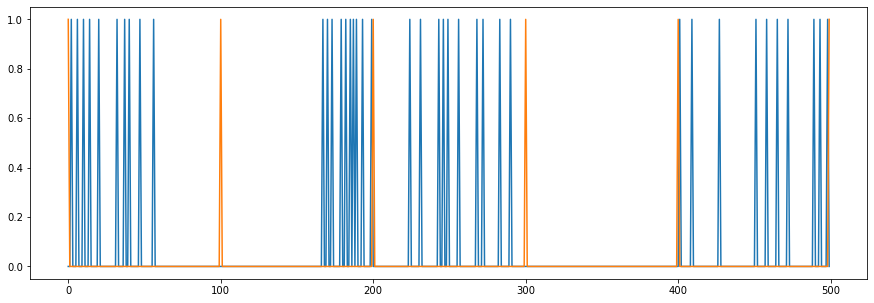

In [27]:
st5 = get_spike_train(data4, 2, 0, 5)
#taste 2, neuron 0, trial 5
figure = plt.figure(figsize=(15,5))
plt.plot(st5)
lick_plot = np.zeros(shape=(500))
lick_plot[[0, 100, 200, 300, 400, 499]] = 1
plt.plot(lick_plot)

In [37]:
#here lets go back to list phase codes and see how high we can make base_rate and how low i can manipulate the alpha values
#NEXT lets take a look at maybe VERY low alpha*R values  - 0.2,0.3,0.4 etc. See how the esa performs here.

nTastes = 5
nNeurons = 1
nTrials = 20
base_rate = 10
data5_phase_codes = [5, 1, 2, 3, 4]
alphas5 = [1.01, 1.02, 1.03, 1.04, 1.05]

In [39]:
data5 = make_synthetic_data(nTastes=nTastes, nNeurons=nNeurons, nTrials=nTrials, 
                            rate=base_rate, alpha=alphas5, phase=data5_phase_codes)

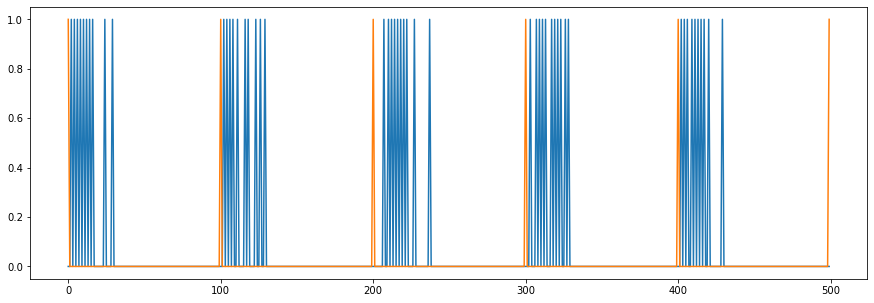

In [42]:
st6 = get_spike_train(data5, 0, 0, 5)
#taste 0, neuron 0, trial 5
figure = plt.figure(figsize=(15,5))
plt.plot(st6)
lick_plot = np.zeros(shape=(500))
lick_plot[[0, 100, 200, 300, 400, 499]] = 1
plt.plot(lick_plot)

In [43]:
np.sum(st6)

51.0

In [ ]:
nTastes = 5
nNeurons = 50
nTrials = 20
rate=4
alpha=[1, 1.3, 1.1, 1.2, 1.5]

In [ ]:
s1 = make_synthetic_data(nTastes, nNeurons, nTrials, rate, alpha, p1)

In [ ]:
s1

In [ ]:
lick_st = np.zeros(shape=(500))
lick_times = [0, 100, 200, 300, 400, 499]
for i in lick_times:
    lick_st[i] = 1

In [ ]:
st1 = s1.iloc[63, 3:]
plt.figure(figsize=(15,5))
plt.plot(st1)
plt.plot(lick_st)

In [ ]:
np.sum(st1)

In [ ]:
s1.iloc[63,:]

In [ ]:
st2 = s1.iloc[2432, 3:]
plt.figure(figsize=(15,5))
plt.plot(st2)
plt.plot(lick_st)

In [ ]:
s1.iloc[2432,:]

In [ ]:
st3 = s1.iloc[1, 3:]
plt.figure(figsize=(15,5))
plt.plot(st3)
plt.plot(lick_st)

In [ ]:
plt.plot(smooth_spike_train(st1, 15))